In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('prep.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
#!pip install Tensorflow
#!pip install Keras

In [4]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(5, activation = 'relu', input_dim = 5))

# Adding the output layer
cnn.add(Dense(3, activation = 'sigmoid'))


# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
import sys
sys.setrecursionlimit(10000)

In [7]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size =8, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
7/7 [==============================] - 1s 38ms/step - loss: 0.6987 - accuracy: 0.4545 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.4545 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.4727 - val_loss: 0.6923 - val_accuracy: 0.5714
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5091 - val_loss: 0.6854 - val_accuracy: 0.5714
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6771 - accuracy: 0.5273 - val_loss: 0.6785 - val_accuracy: 0.5714
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6710 - accuracy: 0.5273 - val_loss: 0.6727 - val_accuracy: 0.5714
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.5455 - val_loss: 0.6669 - val_accuracy: 0.5714
Epoch 8/20
7/7 [=================

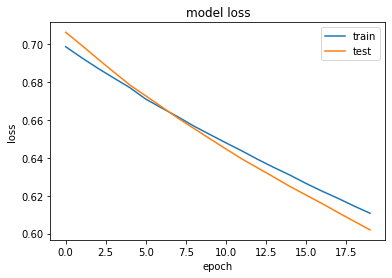

In [8]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [15]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 1]
 [2 2]]


Распознано неверно 3 обьекта

Делаю вывод, что модель логистической регрессии более качествена. Несмотря на ряд испытаний с НН - добиться лучшего результата не удалось.